# Class 6: Array computations

In this notebook we explore computations on arrays of data. 

In [1]:
import YData

# YData.download.download_class_code(6)   # get class 6 code    

# YData.download.download_class_code(6, True) # get the code with the answers 

There are also similar functions to download the homework:

In [2]:
# YData.download_homework(3)  # downloads the third homework if you have not done so already

If you are using Google Colabs, you should install the YData package and mount Google Drive by uncommenting and running the code below.

In [3]:
# !pip install https://github.com/lederman/YData_package/tarball/master
# from google.colab import drive
# drive.mount('/content/drive')

## 0. Warm-up exercises: NBA salaries

Let's do some warm-up exercises by looking at statistics of basketball players in the NBA! The data we will analyze contains infomration about each player including their salary from the 2022-2023 season listed in millions of dollars. This table can be found online: https://www.kaggle.com/datasets/jamiewelsh2/nba-player-salaries-2022-23-season

We will load the data as a "pandas DataFrame" which is a data structure we will discuss more in a couple of weeks. We will then convert the data to lists to explore it further. The lists we are creating are:

- `name_list`: A list of the basketball players' names
- `salary_list`: A list of salaries
- `position_list`: A list of the positions each player plays
- `team_list`: A list of which team each player is on
- `points_per_game_list`: A list showing the average number of points each player scored per game


In [4]:
# load the data and display the first 6 rows

import YData
import pandas as pd

YData.download_data("nba_salaries_2022_23_all.csv")
nba = pd.read_csv("nba_salaries_2022_23_all.csv")  # load in the data

nba[["Player Name", "Salary", "Position", "Team", "PTS"]].head()  # show the first 6 rows


The file `nba_salaries_2022_23_all.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


,Player Name,Salary,Position,Team,PTS
0,Stephen Curry,48070014,PG,GSW,29.4
1,John Wall,47345760,PG,LAC,11.4
2,Russell Westbrook,47080179,PG,LAL/LAC,15.9
3,LeBron James,44474988,PF,LAL,28.9
4,Kevin Durant,44119845,PF,BRK/PHO,29.1


In [5]:
# extract the salaries and the player positions as lists

name_list = nba["Player Name"].to_list()
salary_list = nba["Salary"].to_list()
position_list = nba["Position"].to_list()
team_list = nba["Team"].to_list()
points_per_game_list = nba["PTS"].to_list()



### Warm-up exercise 1: Categorical analyses

Can you do the following:
- Calculate the proportion of players who play on the Boston Celtics ("BOS")?

If you finish the other warm-up exercises, you can also try creating a bar plot showing the number of players on the Boston Celtics ("BOS"), New York Knicks ("NYK") and Golden State Warriors ("GSW").

In [6]:
# Proportion of players on the Celtics
team_list.count('BOS')/len(team_list)


0.034261241970021415

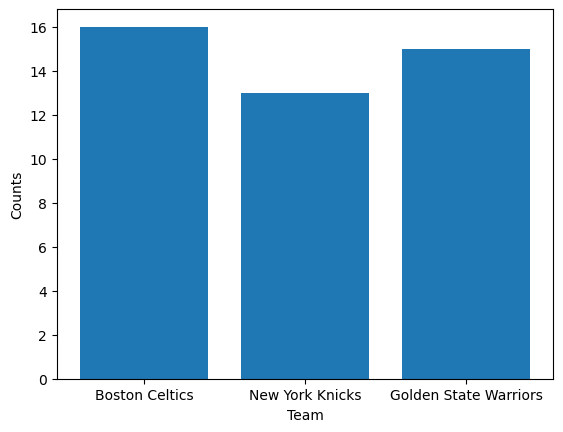

In [7]:
# If you finish the other warm-up exercies, you can create a bar plot showing the number of players on "BOS", "NYK", and "GSW"

import matplotlib.pyplot as plt
%matplotlib inline

# Create a list of counts of players on the three teams
team_counts = [team_list.count("BOS"), 
               team_list.count("NYK"),
               team_list.count('GSW')]

# Create the team names
team_names = ["Boston Celtics", "New York Knicks", "Golden State Warriors"]


# Create a bar chart of how many players are on each team. Be sure to label your axes!
plt.bar(team_names, team_counts);
plt.ylabel("Counts");
plt.xlabel("Team");


### Warm-up exercise 2: One quantitative variable analyses

Can you do the following:

1. Create a histogram of the player salaries
2. Calculate the mean salary, the median salary, and the standard deviation of salaries
3. Calcualte the z-score for the first player's salary (i.e., Stephen Curry's salary)


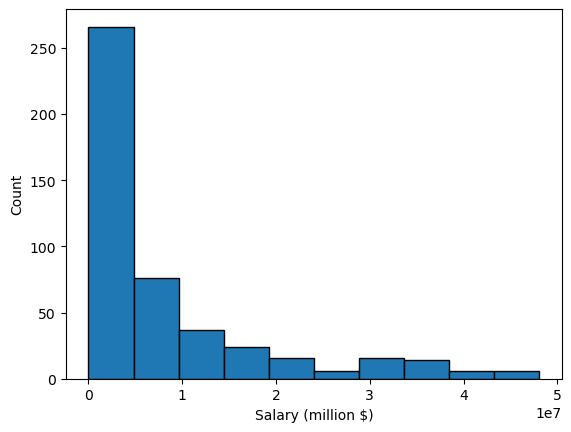

In [8]:
# Plot a histogram of NBA salaries

plt.hist(salary_list, edgecolor = "k");
plt.ylabel("Count");
plt.xlabel("Salary (million $)");

In [9]:
import statistics

# mean salary
print(sum(salary_list)/len(salary_list))
print(statistics.mean(salary_list))

# median salary
statistics.median(salary_list)

# standard deviation of salaries
statistics.stdev(salary_list)


8416598.74732334
8416598.74732334


10708118.046519598

In [10]:
# z-score for the first player's salary (i.e., z-score for Stephen Curry's salary)

(salary_list[0] - statistics.mean(salary_list))/statistics.stdev(salary_list)


3.7031171192182546

### Warm-up exercise 3: Two-quantitative variables

Can you do the following:

1. Create a scatter plot of salary as a function of the points scored per game
2. Guess what you believe correlation is between salary and points per game, and then calculate the correlation to see if your guess was close.


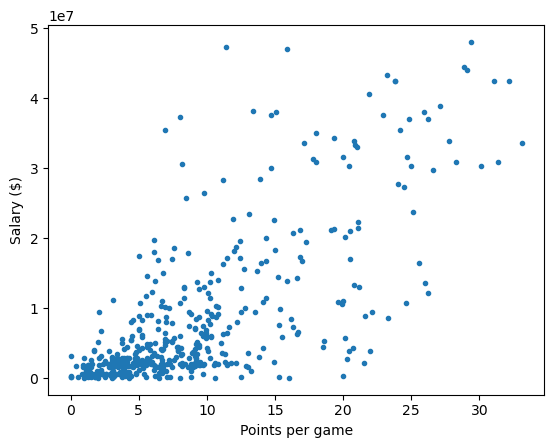

In [11]:
plt.plot(points_per_game_list, salary_list, '.');
plt.xlabel("Points per game");
plt.ylabel("Salary ($)");

In [12]:
# guess the correlation and then calculate it
statistics.correlation(points_per_game_list, salary_list)

0.7275966928493115

## 1. Creating Arrays

Often we want to process data that is all of the same type. For example, we might want to do processing on a data set of numbers (e.g., if we were just analyzing salary data). 

When we have data that is all of the same type, there are faster ways to process data than using a list. In Python, the `numpy` package offers ways to store and process data that is all of the same type using a data structure called a `ndarray`. There are also functions that operate on `ndarrays` that can do computations very efficiently. 

Let's explore this now!

In [13]:
# import the numpy package
import numpy as np

In [14]:
# create an ndarry of numbers
a_list = [2, 3, 4, 5]
an_array = np.array(a_list)

an_array

array([2, 3, 4, 5])

In [15]:
# we can get the type of elements in an array by accessing the dtype property
an_array.dtype

dtype('int64')

In [16]:
# get the size of the array
an_array.shape

(4,)

In [17]:
# create an array of strings
string_array = np.array(["a", "b", "c"])
string_array

array(['a', 'b', 'c'], dtype='<U1')

In [18]:
# get the type in the string array
string_array.dtype      # < little endian byte order, U unicode string, of maximum length 1.

dtype('<U1')

In [19]:
# variation
np.array(["abc", "b", "c"]).dtype      # < little endian byte order, U unicode string, of maximum length 3.

dtype('<U3')

In [20]:
# create a boolean array
boolean_array = np.array([True, True, False])
boolean_array

array([ True,  True, False])

In [21]:
# get the type in the boolean array
boolean_array.dtype

dtype('bool')

In [22]:
# what happens if we make an array from a list of mixed values
mixed_array = np.array([1, 2, "three"])
mixed_array

array(['1', '2', 'three'], dtype='<U21')

In [23]:
# get the dtype 
mixed_array.dtype

dtype('<U21')

In [24]:
# get the 0th element of the mixed_array
mixed_array[0]

np.str_('1')

In [25]:
# get the type of the 0th element
type(mixed_array[0])

numpy.str_

In [26]:
# is the 0th element equal to the integer 1? 
mixed_array[0] == 1

False

In [27]:
# is the 0th element equal to the string '1'? 
mixed_array[0] == '1'

True

In [28]:
# create sequential numbers 1 to 9
sequential_nums = np.arange(1, 10)      


## 2. NumPy functions on numerical arrays

The NumPy package has a number of functions that operate very efficiently on numerical ndarrays.

Let's explore these functions by looking at the price of gas!

The data comes from: https://www.eia.gov/opendata/v1/qb.php?category=240692&sdid=PET.EMM_EPM0_PTE_NUS_DPG.W

In [29]:
# If loading the data using pandas_datareader.fred, you can uncomment this code and load this data

##  Download the data - code based on a fixed .csv file
#YData.download.download_data('US_Gasoline_Prices_Weekly.csv')
#import pandas as pd
#gas_data = pd.read_csv("US_Gasoline_Prices_Weekly.csv", parse_dates=[0])  # load in the data
#gas_data.head()
#gas_data_2023 = gas_data[(gas_data['Week'] > '2023-01-01') & (gas_data['Week'] < '2024-01-01')] 
#gas_prices_2023 = gas_data_2023["DollarsPerGallon"].values
#gas_dates_2023 = gas_data_2023["Week"].values

In [30]:
# Read in the price of gas directly from the FRED

from pandas_datareader.fred import FredReader

gas_data = FredReader("GASREGW", start='2019-06-01', end='2024-09-01').read().reset_index() 

gas_data_2023 = gas_data[(gas_data['DATE'] > '2023-01-01') & (gas_data['DATE'] < '2024-01-01')] 

gas_data_2023.head()


,DATE,GASREGW
187,2023-01-02,3.223
188,2023-01-09,3.259
189,2023-01-16,3.310
190,2023-01-23,3.415
191,2023-01-30,3.489


In [31]:
# Get an ndarray of the gas prices from each week of 2023
# You can ignore this code for now...

gas_prices_2023 = gas_data_2023["GASREGW"].values
gas_dates_2023 = gas_data_2023["DATE"].values


In [32]:
# prices for all 52 weeks in 2022
gas_prices_2023.shape   

(52,)

In [33]:
# print the prices and the dates
print(gas_prices_2023)
print(gas_dates_2023)

[3.223 3.259 3.31  3.415 3.489 3.444 3.39  3.379 3.342 3.389 3.456 3.422
 3.421 3.497 3.596 3.663 3.656 3.6   3.533 3.536 3.534 3.571 3.541 3.595
 3.577 3.571 3.527 3.546 3.559 3.596 3.757 3.828 3.85  3.868 3.813 3.807
 3.822 3.878 3.837 3.798 3.684 3.576 3.533 3.473 3.396 3.349 3.289 3.238
 3.231 3.136 3.053 3.116]
['2023-01-02T00:00:00.000000000' '2023-01-09T00:00:00.000000000'
 '2023-01-16T00:00:00.000000000' '2023-01-23T00:00:00.000000000'
 '2023-01-30T00:00:00.000000000' '2023-02-06T00:00:00.000000000'
 '2023-02-13T00:00:00.000000000' '2023-02-20T00:00:00.000000000'
 '2023-02-27T00:00:00.000000000' '2023-03-06T00:00:00.000000000'
 '2023-03-13T00:00:00.000000000' '2023-03-20T00:00:00.000000000'
 '2023-03-27T00:00:00.000000000' '2023-04-03T00:00:00.000000000'
 '2023-04-10T00:00:00.000000000' '2023-04-17T00:00:00.000000000'
 '2023-04-24T00:00:00.000000000' '2023-05-01T00:00:00.000000000'
 '2023-05-08T00:00:00.000000000' '2023-05-15T00:00:00.000000000'
 '2023-05-22T00:00:00.000000000'

In [34]:
# One dollar is currently 141 Yen. What has been the price of a gallon of gas cost in Yen? 
# What have gas prices been in Euros? 
gas_prices_2023 * 141

array([454.443, 459.519, 466.71 , 481.515, 491.949, 485.604, 477.99 ,
       476.439, 471.222, 477.849, 487.296, 482.502, 482.361, 493.077,
       507.036, 516.483, 515.496, 507.6  , 498.153, 498.576, 498.294,
       503.511, 499.281, 506.895, 504.357, 503.511, 497.307, 499.986,
       501.819, 507.036, 529.737, 539.748, 542.85 , 545.388, 537.633,
       536.787, 538.902, 546.798, 541.017, 535.518, 519.444, 504.216,
       498.153, 489.693, 478.836, 472.209, 463.749, 456.558, 455.571,
       442.176, 430.473, 439.356])

In [35]:
# what if there was a constant tax of $2 on each gallon purchased? 
gas_prices_2023 + 2

array([5.223, 5.259, 5.31 , 5.415, 5.489, 5.444, 5.39 , 5.379, 5.342,
       5.389, 5.456, 5.422, 5.421, 5.497, 5.596, 5.663, 5.656, 5.6  ,
       5.533, 5.536, 5.534, 5.571, 5.541, 5.595, 5.577, 5.571, 5.527,
       5.546, 5.559, 5.596, 5.757, 5.828, 5.85 , 5.868, 5.813, 5.807,
       5.822, 5.878, 5.837, 5.798, 5.684, 5.576, 5.533, 5.473, 5.396,
       5.349, 5.289, 5.238, 5.231, 5.136, 5.053, 5.116])

In [36]:
# basic functions of: min, max, etc.
print([np.min(gas_prices_2023), np.max(gas_prices_2023)])
print(np.array([np.min(gas_prices_2023), np.max(gas_prices_2023)]))

[np.float64(3.053), np.float64(3.878)]
[3.053 3.878]


In [37]:
# if you bought one gallon each week, what would you pay over the whole year? 
print(np.sum(gas_prices_2023))  

182.969


In [38]:
# what do you pay on average? 
print(np.mean(gas_prices_2023))
print(np.median(gas_prices_2023))

3.5186346153846153
3.5335


In [39]:
# If you bought one gallon each week, how much would you pay at the end of each of the weeks of the year? 
np.cumsum(gas_prices_2023)

array([  3.223,   6.482,   9.792,  13.207,  16.696,  20.14 ,  23.53 ,
        26.909,  30.251,  33.64 ,  37.096,  40.518,  43.939,  47.436,
        51.032,  54.695,  58.351,  61.951,  65.484,  69.02 ,  72.554,
        76.125,  79.666,  83.261,  86.838,  90.409,  93.936,  97.482,
       101.041, 104.637, 108.394, 112.222, 116.072, 119.94 , 123.753,
       127.56 , 131.382, 135.26 , 139.097, 142.895, 146.579, 150.155,
       153.688, 157.161, 160.557, 163.906, 167.195, 170.433, 173.664,
       176.8  , 179.853, 182.969])

In [40]:
# How much does the gas price go up and down each week? 
np.diff(gas_prices_2023)

array([ 0.036,  0.051,  0.105,  0.074, -0.045, -0.054, -0.011, -0.037,
        0.047,  0.067, -0.034, -0.001,  0.076,  0.099,  0.067, -0.007,
       -0.056, -0.067,  0.003, -0.002,  0.037, -0.03 ,  0.054, -0.018,
       -0.006, -0.044,  0.019,  0.013,  0.037,  0.161,  0.071,  0.022,
        0.018, -0.055, -0.006,  0.015,  0.056, -0.041, -0.039, -0.114,
       -0.108, -0.043, -0.06 , -0.077, -0.047, -0.06 , -0.051, -0.007,
       -0.095, -0.083,  0.063])

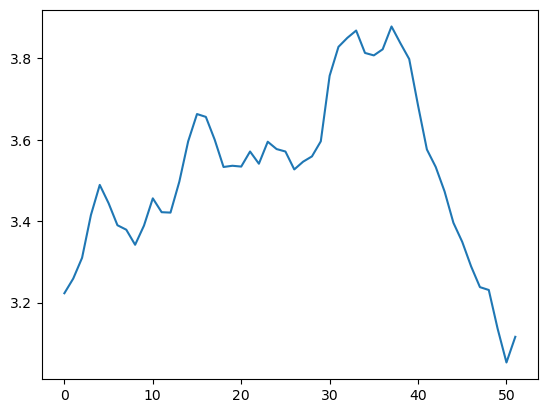

In [41]:
# plot the gas prices
plt.plot(gas_prices_2023);  

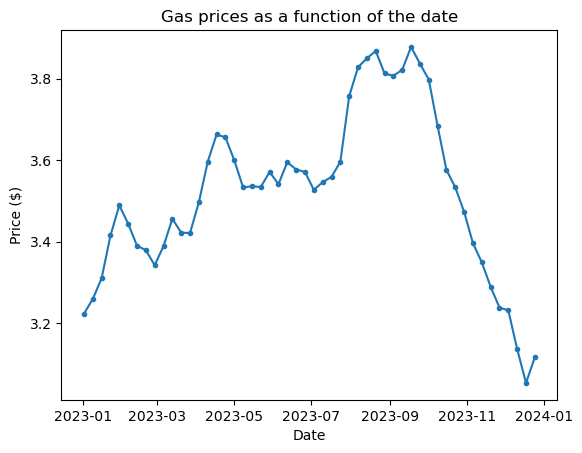

In [42]:
# plot the gas prices better!
plt.plot(gas_dates_2023, gas_prices_2023, '.-');  
plt.xlabel("Date");
plt.ylabel("Price ($)")
plt.title("Gas prices as a function of the date");

<br>
<br>
<br>
<p>
<center><img src=https://cdn.quotesgram.com/img/69/59/1803591020-high-gas-prices.jpg></center>

## 3. Boolean arrays

We can easily compare all values in an ndarray to a particular value. The result will return an ndarray of Booleans. 

Since Boolean `True` values are treated as 1's, and Boolean `False` values are treated as 0's, this makes it easy to see how many values in an array meet particular conditions. 

In [43]:
# Test all values in an array that are less than 5
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])
my_array < 5

array([False,  True, False,  True,  True,  True, False,  True])

In [44]:
# How many values are less than 5?
np.sum(my_array < 5)

np.int64(5)

In [45]:
# How many (and what proportion) of weeks in 2023 were gas prices were below $3.50?
np.sum(gas_prices_2023 < 3.50)

np.int64(23)

### Example: What proportion of movies passed the Bechdel test revisited 

Let's calculate (again) the proportion of movies that passed the Bechdel test, but this time using numpy array computations. 

The code below loads the Bechdel data, and we will focus on the `bechdel` list, which is a list of strings saying whether movies passed ('PASS') or failed ('FAIL') the Bechdel test.



In [46]:
import YData
import pandas as pd

YData.download_data("movies.csv")

movies = pd.read_csv("movies.csv")
col_names_to_keep = ['year', 'imdb', 'title', 'clean_test', 'binary', 'budget',
       'domgross', 'budget_2013', 'domgross_2013', 'decade_code', 'imdb_id',
       'rated', 'imdb_rating', 'runtime',  'imdb_votes']
movies =   movies[col_names_to_keep]

movies.dropna(axis = 0, how = 'any', inplace = True, subset=col_names_to_keep[0:9])


# get lists of data for our data analysis
title = movies["title"].to_list()
bechdel = movies["binary"].to_list()
bechdel_reason = movies["clean_test"].to_list()

domgross_2013 = movies["domgross_2013"].to_list()
budget_2013 = movies["budget_2013"].to_list() 
year = movies["year"].to_list()


bechdel[0:5]


The file `movies.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


['FAIL', 'PASS', 'FAIL', 'FAIL', 'FAIL']

In [47]:

# convert the list to an ndarray
bechdel_array = np.array(bechdel)


# create a Boolean array of that is True for movies that passed the Bechdel test
#passed_booleans = bechdel_array == "PASS"   # also ok.
passed_booleans = (bechdel_array == "PASS")

print(passed_booleans[0:5])


# calculate the proportion of movies that passed the Bechdel test
print(np.sum(passed_booleans)/passed_booleans.shape[0])


# alternatively, we can use the np.mean() function 
np.mean(passed_booleans)



[False  True False False False]
0.44707207207207206


np.float64(0.44707207207207206)

## 4. Boolean subsetting/indexing/masking

We can also use Boolean arrays to return values in another array. This is referred to as "Boolean Subsetting", Boolean masking" or "Boolean indexing"


In [48]:
# initial array
my_array = np.array([12, 4, 6, 3, 4, 3, 7, 4])

# create Boolean array for values less than 5
boolean_array = my_array < 5    

print(boolean_array)

# get values of my_array that are less than 5
my_array[boolean_array]


[False  True False  True  True  True False  True]


array([4, 3, 4, 3, 4])

### Example: calculate the average revenue for movies that passed the Bechdel test 

In [49]:
# Calculate the average revenue for movies that passed the Bechdel test 

# create an ndarray of revenues
domgross_2013_array = np.array(domgross_2013)

# use the boolean mask to extract movies the pass the Bechdel test
passed_domgross_2013 = domgross_2013_array[passed_booleans]
print(len(passed_domgross_2013))

# get the average revenue of movies that passed the Bechdel test
np.mean(passed_domgross_2013)

794


np.float64(79591918.51259446)

## 5. Percentiles

The Pth percentile is the value of a quantitative variable which is greater than P percent of the data. 

We can calculate percentiles using the numpy function `np.percentile()`

Let's calculate the 25th, 50th, and 75th percentile for the Bechdel movie revenue data.


In [50]:
## Get the 25th, 50th and 75th percentile of movie revenues

bechdel_percentiles = np.percentile(domgross_2013_array, [25, 50, 75])

bechdel_percentiles


array([2.05465938e+07, 5.59936405e+07, 1.21678352e+08])

Question: What is another way to calculate the 50th percentile? 


In [51]:
# A: The 50th percentile is the median so we can also calculate it using np.median()

np.median(domgross_2013_array)

np.float64(55993640.5)

Other commonly calculated statistics include:

- Five Number Summary = (minimum, Q1, median, Q3, maximum)
- Range = maximum – minimum
- Interquartile range (IQR) = Q3 – Q1

Where:
- Q1 = 25th percentile
- Q3 = 75th percentile

Let's calculate these for the Bechdel revenue data...


In [52]:
# Range

np.max(domgross_2013_array) - np.min(domgross_2013_array)


np.float64(1771681891.0)

In [53]:
# Interquartile range (IQR)

print(np.percentile(domgross_2013_array, 75) - np.percentile(domgross_2013_array, 25))


# Alternatively
np.diff(np.percentile(domgross_2013_array, [25, 75]))


101131758.25


array([1.01131758e+08])

In [54]:
# Five number summary

five_num = np.array([np.min(domgross_2013_array), 
                     np.percentile(domgross_2013_array, 25),
                     np.percentile(domgross_2013_array, 50),
                     np.percentile(domgross_2013_array, 75),
                     np.max(domgross_2013_array)])

print(five_num)


# Alternatively

np.percentile(domgross_2013_array, [0, 25, 50, 75, 100])


[8.99000000e+02 2.05465938e+07 5.59936405e+07 1.21678352e+08
 1.77168279e+09]


array([8.99000000e+02, 2.05465938e+07, 5.59936405e+07, 1.21678352e+08,
       1.77168279e+09])

## 5. Box plots

A box plot is a graphical display of the five-number summary and consists of:

   1. Drawing a box from Q1  to Q3   

   2. Dividing the box with a line (or dot) drawn at the median

   3. Draw a line from each quartile to the most extreme data value that is not and outlier

   4. Draw a dot/asterisk for each outlier data point.


Create a side-by-side boxplot showing the revenue of movies that passed and failed the Bechdel test


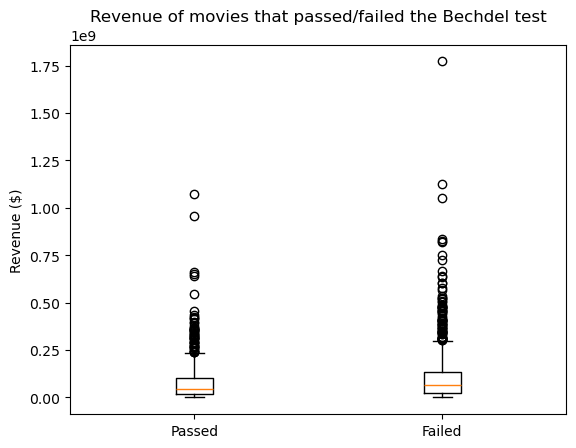

In [55]:
# get the movies that failed the Bechdel test
failed_domgross_2013 = domgross_2013_array[bechdel_array == "FAIL"]


# create a side-by-side boxplot showing the revenue of movies that passed and failed the Bechdel test
#plt.boxplot([passed_domgross_2013, failed_domgross_2013], labels= ["Passed", "Failed"]);  # The old parameter name "labels" was renamed "tick_lables".
plt.boxplot([passed_domgross_2013, failed_domgross_2013], 
            tick_labels= ["Passed", "Failed"]);
plt.ylabel("Revenue ($)");
plt.title("Revenue of movies that passed/failed the Bechdel test");



## 6. Higher dimensional arrays

In [56]:
my_matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
my_matrix

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [57]:
# slicing to get a submatrix 
my_matrix[0:2, 0:2]   # like array slicing, it does return a value at the end index

array([[1, 2],
       [4, 5]])

In [58]:
my_matrix2 = my_matrix.copy()  # copy the matrix
my_matrix2[0:2, 0:2] = 100  # set particular index values to 100

my_matrix2

array([[100, 100,   3],
       [100, 100,   6],
       [  7,   8,   9]])

In [59]:
# sum all the values
print(np.sum(my_matrix))

45


In [60]:
# sum down the rows 
np.sum(my_matrix, axis = 0)

array([12, 15, 18])

In [61]:
# sum across the columns
np.sum(my_matrix, axis = 1)

array([ 6, 15, 24])

In [62]:
# create a boolean array for all values less than 5
my_matrix < 5

array([[ True,  True,  True],
       [ True, False, False],
       [False, False, False]])

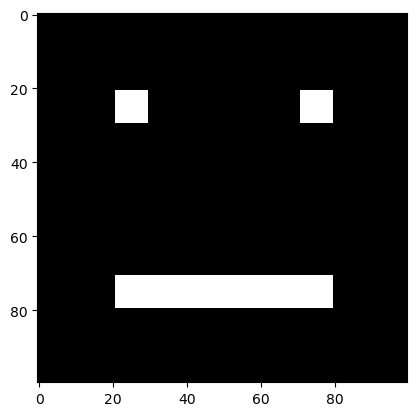

In [63]:
# what does the following do? 

face_array = np.zeros([100, 100])  # create a matrix of all 0's 

face_array[21:30, 21:30] = 1  # assign particular regions the value of 1
face_array[21:30, 71:80] = 1
face_array[71:80, 21:80] = 1

plt.imshow(face_array, cmap = 'gray');
#plt.colorbar();

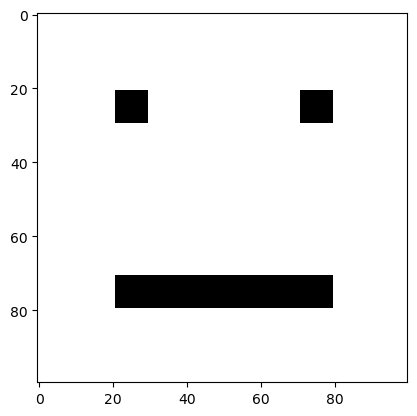

In [64]:
# convert face_array to a boolean matrix
face_array = face_array.astype("bool")
plt.imshow(~face_array, cmap = 'gray');

## 7. Image processing

We can use numerical arrays (and NumPy) to do image processing. Let's explre this now.

In [65]:
# download an image of a famous Yale alumni
YData.download.download_image("burns.jpeg")

The file `burns.jpeg` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


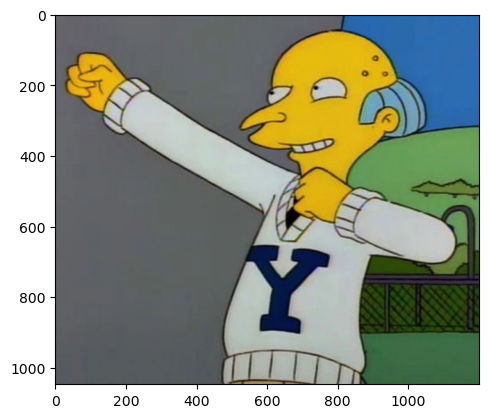

In [66]:
# load in an image 

from imageio.v3 import imread

I = imread("burns.jpeg")

plt.imshow(I);

In [67]:
# get the type and shape of the image
print(I.dtype)
I.shape

uint8


(1047, 1200, 3)

(1047, 1200, 3)
float64


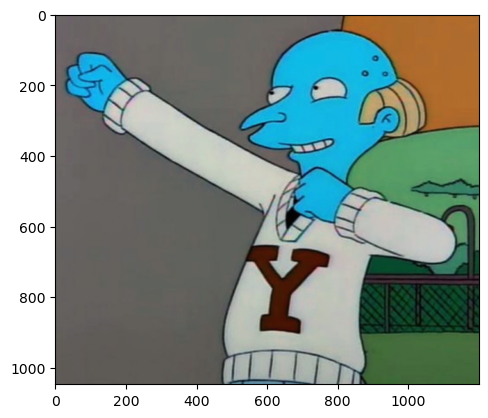

In [68]:
# Let's reverse the red and blue channels

# extract each color channel as a matrix
r_channel = I[:, :, 0]
g_channel = I[:, :, 1]
b_channel = I[:, :, 2]

# create new image where color channels will be swapped
rev_rb = np.zeros(I.shape)
print(rev_rb.shape)

# swap channels
rev_rb[:, :, 0] = b_channel
rev_rb[:, :, 1] = g_channel
rev_rb[:, :, 2] = r_channel

# convert to ints
print(rev_rb.dtype)
rev_rb = rev_rb.astype("int")

# display the image
plt.imshow(rev_rb);

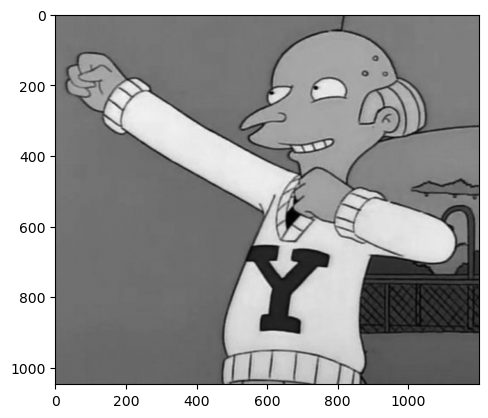

In [69]:
# To create a grayscale image - use the average value in all three r, g, b channels

mean_image = np.mean(I, axis = 2)

plt.imshow(mean_image, cmap='gray');

(1047, 1200, 3)


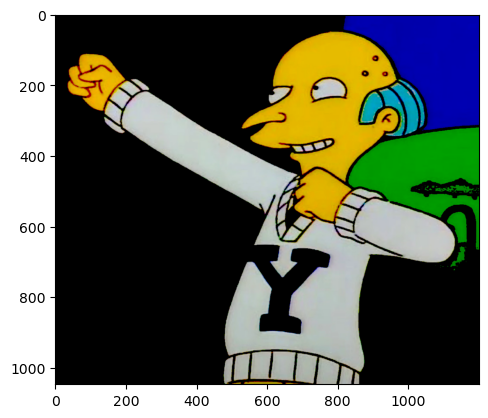

In [70]:
# Image masking - make all drak pixels even darker (set to a value of 0)

# copy the image and create a darkening mask
darken = I.copy()
darken_mask = darken < 128
print(darken_mask.shape)

# darken the pixels and display the image
darken[darken_mask] = 0
plt.imshow(darken);

## 8. Tuples

Tuples are a basic data structure in Python that is like a list. However, unlike lists, elements in tuples are "immutable" meaning that once we create a tuple, we can not modify the values in the tuple.

We create tuples by using values in parentheses separated by commas:

`my_tuple = (10, 20, 30)`

Let's explore tuples now... 


In [71]:
# create a tuple

my_tuple = (10, 20, 30)

my_tuple


(10, 20, 30)

In [72]:
# we can access elements of the tuple using square brackets (the same as lists)
my_tuple[1]

20

In [73]:
# unlike a list, we can't reassign values in a tuple 
# my_tuple[1] = 50

In [74]:
# We extract values from tuples into regular names using "tuple unpacking"

val1, val2, val3 = my_tuple


val3

30

## 9. Dictionaries

Dictionaries allow us to look up values. In particular, we provide a "key" and the dictionary return a "value". 

We can create dictionaries using the syntax: 

`my_dict = {"key1": 1, "key2": 20}`


In [75]:
# create a dictionary
my_dict = {"key1": 1, "key2": 20}
my_dict

{'key1': 1, 'key2': 20}

In [76]:
# we can access elements using square brackets 
my_dict["key2"]

20

In [77]:
# values in dictionaries can be list
my_dict2 = {"a": [1, 2, 3, 4], "b": ["a", "b", "c"], "c": [True, False]}
my_dict2["c"]

[True, False]

In [78]:
# We can create a dictionary from two lists of the same length using the dict() and zip() functions

my_list = [1, 2, 3]
my_list2 = ["a", "b", "c"]

my_dict3 = dict(zip(my_list2, my_list))

print(my_dict3)

my_dict3["b"]


{'a': 1, 'b': 2, 'c': 3}


2

In [79]:
# create a dictionary between players and their salaries
# player_salaries = dict(zip(player_array, salary_array))

# what is Stephen Curry's salary? 
# player_salaries["Stephen Curry"]

## 10. Pandas 

pandas Series are: 0ne-dimensional ndarray with axis labels

pands DataFrame are: Table data

Let's look at the egg and wheat price data...


In [80]:
YData.download.download_data("monthly_egg_prices.csv");
YData.download.download_data("dow.csv");

The file `monthly_egg_prices.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.
The file `dow.csv` already exists.
If you would like to download a new copy of the file, please rename the existing copy of the file.


In [81]:
# reading in a series by parsing the dates, and using .squeeze() to conver to a Series
egg_prices_series = pd.read_csv("monthly_egg_prices.csv", parse_dates=True, date_format="%m/%d/%y", index_col="DATE").squeeze()


# print the type
print(type(egg_prices_series))

# print the shape
print(egg_prices_series.shape)

# print the series
egg_prices_series


<class 'pandas.core.series.Series'>
(528,)


DATE
1980-01-01    0.879
1980-02-01    0.774
1980-03-01    0.812
1980-04-01    0.797
1980-05-01    0.737
              ...  
2023-08-01    2.043
2023-09-01    2.065
2023-10-01    2.072
2023-11-01    2.138
2023-12-01    2.507
Name: Price, Length: 528, dtype: float64

In [82]:
# get a value from the Series by an Index name using .loc
egg_prices_series.loc["1980-01-01"]

np.float64(0.879)

In [83]:
# get a value from the Series by index number using .iloc
egg_prices_series.iloc[0]

np.float64(0.879)

In [84]:
# use the .filter() method to get data from dates that contain "2023"
egg_prices_2023 = egg_prices_series.filter(like='2023')

# print the length 
print(len(egg_prices_2023))

egg_prices_2023

12


DATE
2023-01-01    4.823
2023-02-01    4.211
2023-03-01    3.446
2023-04-01    3.270
2023-05-01    2.666
2023-06-01    2.219
2023-07-01    2.094
2023-08-01    2.043
2023-09-01    2.065
2023-10-01    2.072
2023-11-01    2.138
2023-12-01    2.507
Name: Price, dtype: float64

In [85]:
# turn the index back into a column using .reset_index()
egg_prices_df = egg_prices_series.reset_index()

# get the type
print(type(egg_prices_df))

# print the values
egg_prices_df


<class 'pandas.core.frame.DataFrame'>


,DATE,Price
0,1980-01-01,0.879
1,1980-02-01,0.774
2,1980-03-01,0.812
3,1980-04-01,0.797
4,1980-05-01,0.737
...,...,...
523,2023-08-01,2.043
524,2023-09-01,2.065
525,2023-10-01,2.072
526,2023-11-01,2.138


## DataFrames!

The ability to manipulate data in tables is one of the most useful skills in Data Science. 

Pandas is the most popular package in Python for manipulating data tables so we will use this package for manipulating tables in this class. The syntax for Pandas can be a little tricky, so try to be patient if you run into errors, and as always, there should be plenty of help available at office hours and on Ed. 

As an example, let's look at data on the closing price of the [Dow Jones Industrial Average](https://www.marketwatch.com/investing/index/djia) which is an index of the prices of the 30 largest corporations in the US.

The code below loads the DOW data into a Pandas DataFrame and displays the first 5 rows using the `head()` method. 


In [86]:
dow = pd.read_csv("dow.csv", parse_dates=[0], date_format="%m/%d/%y", index_col="Date")

dow.head()

,Year,Month,Day,Open,High,Low,Close,Volume
Date,,,,,,,,
1992-01-02,1992,1,Thursday,3152.100098,3172.629883,3139.310059,3172.399902,23550000
1992-01-03,1992,1,Friday,3172.399902,3210.639893,3165.919922,3201.500000,23620000
1992-01-06,1992,1,Monday,3201.500000,3213.330078,3191.860107,3200.100098,27280000
1992-01-07,1992,1,Tuesday,3200.100098,3210.199951,3184.479980,3204.800049,25510000
1992-01-08,1992,1,Wednesday,3204.800049,3229.199951,3185.820068,3203.899902,29040000


In [87]:
# The head() method returns the first 5 rows. 
# Let's use the tail() method to get the last 5 rows.
# From looking at the output, can you tell what year the data goes back until? 

dow.tail()

,Year,Month,Day,Open,High,Low,Close,Volume
Date,,,,,,,,
2024-01-25,2024,1,Thursday,37862.570312,38057.531250,37796.468750,38049.128906,402970000
2024-01-26,2024,1,Friday,38006.679688,38215.308594,37997.769531,38109.429688,387000000
2024-01-29,2024,1,Monday,38115.828125,38343.929688,38061.171875,38333.449219,312480000
2024-01-30,2024,1,Tuesday,38298.230469,38497.390625,38257.800781,38467.308594,326640000
2024-01-31,2024,1,Wednesday,38426.781250,38588.859375,38139.660156,38150.300781,453250000


In [88]:
# get the number of rows and columns in a DataFrame using the shape property
dow.shape

(8080, 8)

In [89]:
# get the types of all the columns using .dtypes
dow.dtypes

Year        int64
Month       int64
Day        object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [90]:
# get the names of all the columns using .columns
print(dow.columns)

# we can convert these names to an numpy array using the .to_numpy() method
dow.columns.to_numpy()

Index(['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


array(['Year', 'Month', 'Day', 'Open', 'High', 'Low', 'Close', 'Volume'],
      dtype=object)

In [91]:
# get more info on the data frame using the .info() method
dow.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8080 entries, 1992-01-02 to 2024-01-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    8080 non-null   int64  
 1   Month   8080 non-null   int64  
 2   Day     8080 non-null   object 
 3   Open    8080 non-null   float64
 4   High    8080 non-null   float64
 5   Low     8080 non-null   float64
 6   Close   8080 non-null   float64
 7   Volume  8080 non-null   int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 568.1+ KB


In [92]:
# get descriptive statistics on DataFrame using the .describe() method

dow.describe().round()   # round() the values, or can convert them to ints using astype("int")

,Year,Month,Open,High,Low,Close,Volume
count,8080.0,8080.0,8080.0,8080.0,8080.0,8080.0,8080.0
mean,2008.0,7.0,14301.0,14386.0,14213.0,14304.0,193183481.0
std,9.0,3.0,8826.0,8870.0,8780.0,8827.0,131129922.0
min,1992.0,1.0,3137.0,3173.0,3096.0,3137.0,8410000.0
25%,1999.0,4.0,8777.0,8855.0,8679.0,8781.0,79940000.0
50%,2008.0,7.0,11067.0,11144.0,10987.0,11069.0,191610000.0
75%,2016.0,10.0,17882.0,17951.0,17792.0,17886.0,278192500.0
max,2024.0,12.0,38427.0,38589.0,38258.0,38467.0,915990000.0
